In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset/train_loan_data.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001052,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [11]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].median())

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Outlier visualization and handling

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


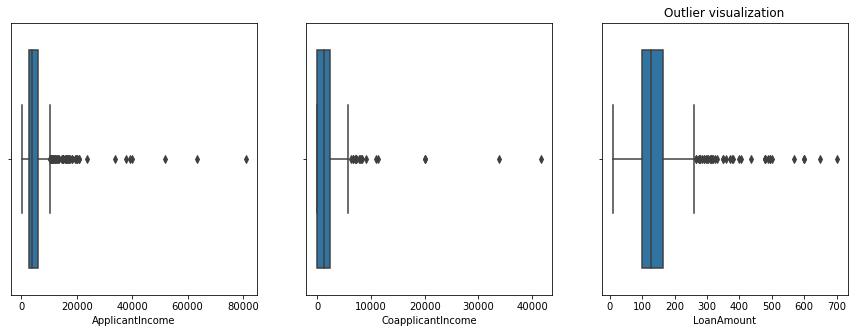

In [14]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(df["ApplicantIncome"])
            
plt.subplot(1,3,2)
sns.boxplot(df["CoapplicantIncome"])
            
plt.subplot(1,3,3)
sns.boxplot(df["LoanAmount"])
            
plt.title("Outlier visualization")

plt.show()

In [15]:
print("dataset with outliers", df.shape)
df = df[df["ApplicantIncome"] < 25000]
print("dataset without outliers", df.shape)

dataset with outliers (614, 13)
dataset without outliers (607, 13)


In [16]:
print("dataset with outliers", df.shape)
df = df[df["CoapplicantIncome"] < 13000]
print("dataset without outliers", df.shape)

dataset with outliers (607, 13)
dataset without outliers (603, 13)


In [17]:
print("dataset with outliers", df.shape)
df = df[df["LoanAmount"] < 450]
print("dataset without outliers", df.shape)

dataset with outliers (603, 13)
dataset without outliers (594, 13)


Analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

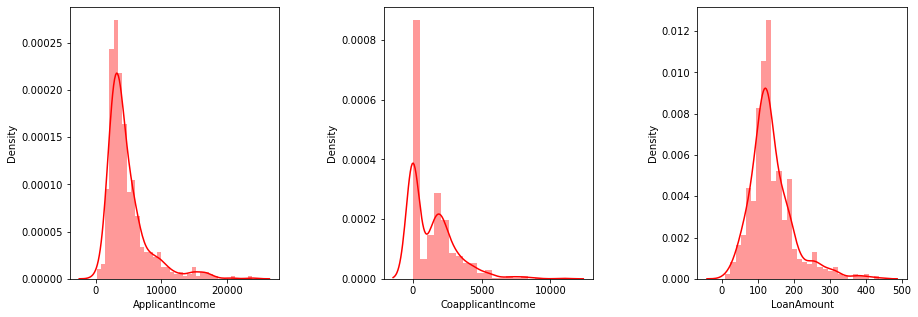

In [35]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.distplot(df["ApplicantIncome"], color = "red")

plt.subplot(1,3,2)
sns.distplot(df["CoapplicantIncome"], color = "red")

plt.subplot(1,3,3)
sns.distplot(df["LoanAmount"], color = "red")

plt.subplots_adjust(wspace=0.5)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

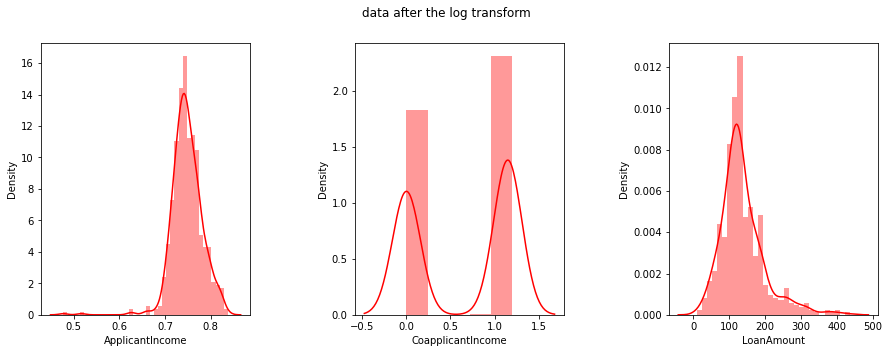

In [38]:
df["ApplicantIncome"] = np.log(df["ApplicantIncome"])
df["CoapplicantIncome"] = np.log1p(df["CoapplicantIncome"])

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.distplot(df["ApplicantIncome"], color = "red")

plt.subplot(1,3,2)
sns.distplot(df["CoapplicantIncome"], color = "red")

plt.subplot(1,3,3)
sns.distplot(df["LoanAmount"], color = "red")

plt.subplots_adjust(wspace=0.5)

plt.suptitle("data after the log transform")
plt.show()

In [50]:
nums = df.select_dtypes("number").columns.tolist()
cat = df.select_dtypes("object").columns.tolist()

In [51]:
nums

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [52]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

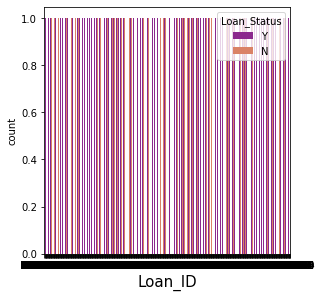

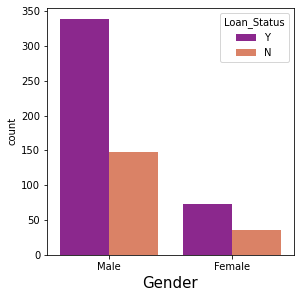

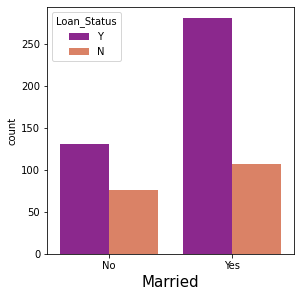

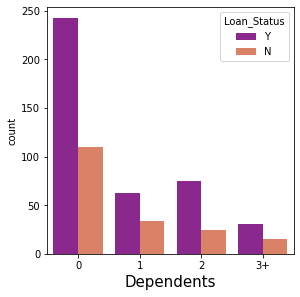

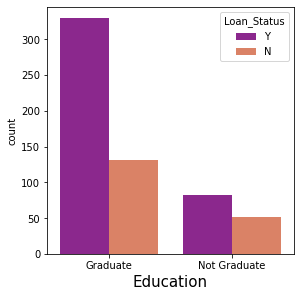

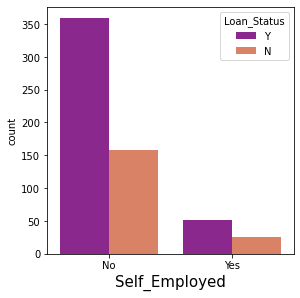

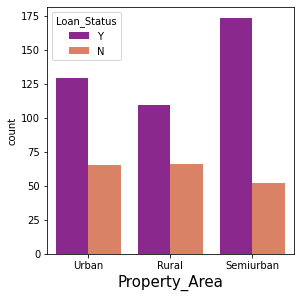

In [53]:
for i in cat[:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x =i, hue = 'Loan_Status', data = df, palette = 'plasma' )
    plt.xlabel(i, fontsize = 15)

Ploting categorical with target data i.e Loan_Status

In [54]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
print(pd.crosstab(df["Loan_Status"], df["Married"]))

Married       No  Yes
Loan_Status          
N             76  107
Y            131  280


In [56]:
print(pd.crosstab(df["Loan_Status"], df["Education"]))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 329            82


In [57]:
print(pd.crosstab(df["Loan_Status"], df["Property_Area"]))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                109        173    129


In [58]:
print(pd.crosstab(df["Loan_Status"], df["Self_Employed"]))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              359   52


In [59]:
print(pd.crosstab(df["Loan_Status"], df["Credit_History"]))

Credit_History  0.0  1.0
Loan_Status             
N                80  103
Y                 6  405


Data Preparation

In [61]:
df.select_dtypes("object").head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [62]:
df = df.drop(["Loan_ID"], axis = 1)

In [63]:
df.select_dtypes("object").head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [64]:
df["Gender"] = df["Gender"].replace(("Male", "Female"),(1,0))
df["Married"] = df["Married"].replace(("Yes", "No"),(1,0))
df["Education"] = df["Education"].replace(("Graduate", "Not Graduate"),(1,0))

In [66]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,0.770262,0.000000,128.0,360.0,1.0,Urban,Y
1,1,1,1,1,No,0.756971,1.137373,128.0,360.0,1.0,Rural,N
2,1,1,0,1,Yes,0.732482,0.000000,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,No,0.723370,1.154009,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,No,0.771620,0.000000,141.0,360.0,1.0,Urban,Y


In [68]:
df["Property_Area"].value_counts()

Semiurban    225
Urban        194
Rural        175
Name: Property_Area, dtype: int64

In [69]:
df["Dependents"].value_counts()

0     352
2      99
1      97
3+     46
Name: Dependents, dtype: int64

In [72]:
df["Self_Employed"] = df["Self_Employed"].replace(("Yes", "No"),(1,0))
df["Loan_Status"] = df["Loan_Status"].replace(("Y", "N"),(1,0))
df["Property_Area"] = df["Property_Area"].replace(("Urban", "Semiurban","Rural"),(1,1,0))
df["Dependents"] = df["Dependents"].replace(("0","1","2","3+"),(0,1,1,1))

In [73]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,0.770262,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,0.756971,1.137373,128.0,360.0,1.0,0,0
2,1,1,0,1,1,0.732482,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,0.723370,1.154009,120.0,360.0,1.0,1,1
4,1,0,0,1,0,0.771620,0.000000,141.0,360.0,1.0,1,1


In [82]:
y = df['Loan_Status']
x = df.drop(['Loan_Status'], axis = 1)

In [83]:
x.shape

(594, 11)

In [84]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [85]:
y.shape

(594,)

Handle Imbalance data

In [86]:
# !pip install -U imbalanced-learn

from imblearn.over_sampling import SMOTE

x_rasmple, y_rasmple = SMOTE().fit_resample(x, y.values.ravel())

In [87]:
print(x_rasmple.shape)
print(y_rasmple.shape)

(822, 11)
(822,)


Train Test Split

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x_rasmple, y_rasmple, test_size = 0.2, random_state = 0)

In [89]:
x_train.shape

(657, 11)

In [91]:
y_test.shape

(165,)

Model Creation

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [97]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
y_pred = LR.predict(x_test)

In [99]:
print("Traning Accuracy", LR.score(x_train, y_train))
print("Test Accuracy", LR.score(x_test, y_test))

Traning Accuracy 0.8036529680365296
Test Accuracy 0.7575757575757576


In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        87
           1       0.70      0.86      0.77        78

    accuracy                           0.76       165
   macro avg       0.77      0.76      0.76       165
weighted avg       0.77      0.76      0.76       165



In [102]:
print("Our model accuracy", accuracy_score(y_pred, y_test))

Our model accuracy 0.7575757575757576


In [104]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,0.770262,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,0.756971,1.137373,128.0,360.0,1.0,0,0
2,1,1,0,1,1,0.732482,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,0.723370,1.154009,120.0,360.0,1.0,1,1
4,1,0,0,1,0,0.771620,0.000000,141.0,360.0,1.0,1,1


In [110]:
model_pred = np.array([[0,1,1, 1, 1,4356, 2333, 138.0, 360, 1, 1]])

In [115]:
prediction = LR.predict(model_pred)
print(prediction[0])

0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
